In [1]:
import numpy as np
import scprep
from src.embedding import RandWalkGeo, new_HeatGeo, BaseEmb, EmbHeatPHATE
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
import phate
from src.filter_approx import Heat_filter
import seaborn as sns
import umap
from sklearn.manifold import TSNE

%matplotlib inline

/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-27 14:05:02.713881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 14:05:04.089799: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 14:05:04.089917: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you

Nice swiss roll figure

In [2]:
knn = 5
tau = 22
methods = {
    "UMAP": umap.UMAP(),
    "t-SNE": TSNE(),
    "PHATE": phate.PHATE(verbose=False),
    "Heat-PHATE": EmbHeatPHATE(knn=knn, tau=tau, anisotropy=1),
    "HeatGeo": new_HeatGeo(knn=knn, tau=tau,),
    "HetGeo Harnack": new_HeatGeo(knn=knn, tau=tau, harnack=True),
}

In [3]:
np.random.seed(42)
x, t = make_swiss_roll(
    2000,
)
x[:, 1] *= 3

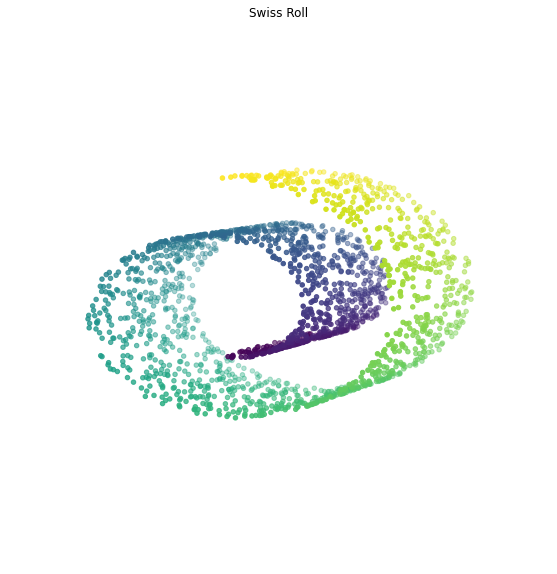

In [14]:
# 3d plot of the data without background 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t, cmap = "viridis")
ax.set_title("Swiss Roll")
ax.set_axis_off()
ax.view_init(4, -72)
plt.show()

Text(0, 0.5, '')

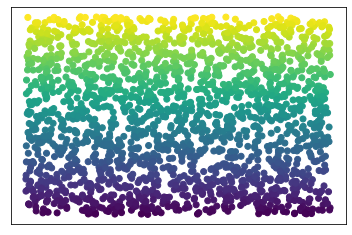

In [16]:
plt.scatter(x[:, 1], t, c=t, cmap = "viridis")
plt.xticks([])
plt.yticks([])
plt.xlabel("")
plt.ylabel("")

In [14]:
embedding = []
n = len(methods)
for name, emb_op in methods.items():
    print(name)
    emb = emb_op.fit_transform(x)
    embedding.append(emb)

UMAP
t-SNE


/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mila/g/guillaume.huguet/.conda/envs/metric_emb/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PHATE
Heat-PHATE


/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


HeatGeo


/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


HetGeo Harnack


/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


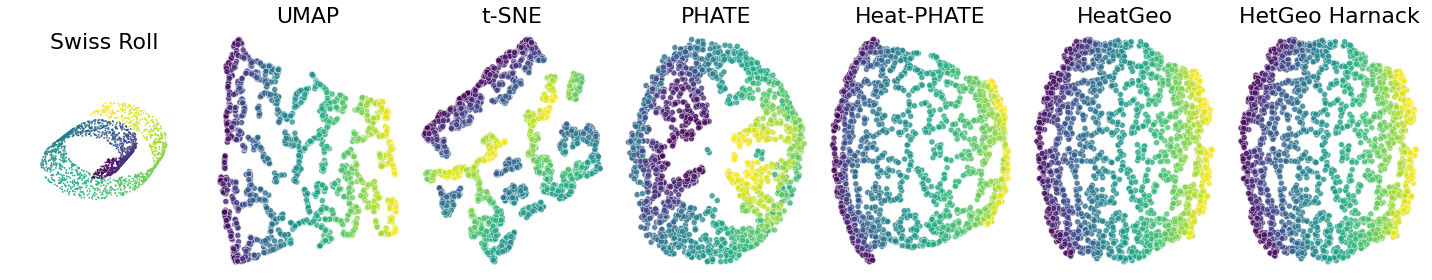

In [16]:
# plot the embeddings with sns
# fig, axes = plt.subplots(1, n, figsize=((n) * 4, 4))
# ax = axes[0]
# sns.scatterplot(x=embedding[0][:, 0], y=embedding[0][:, 1], hue=t, ax=ax)
# ax.set_title("Ground Truth", fontsize=22)
# ax.set_xlabel("")
# ax.set_ylabel("")
# ax.set_xticks([])
# ax.set_yticks([])
cmap = "viridis"
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(1, 7, 1, projection='3d')
ax.set_title("Swiss Roll", fontsize=22)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t, cmap=cmap, s=0.8, alpha=0.8)
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zlabel("")
ax.set_zticks([])
ax.legend().remove()
ax.set_axis_off()
ax.view_init(10, -80)
for i, (name, _) in enumerate(methods.items()):
    ax = fig.add_subplot(1, 7, i + 2)
    # ax = axes[i]
    sns.scatterplot(x=embedding[i][:, 0], y=embedding[i][:, 1], hue=t, ax=ax, palette=cmap, alpha=0.8)
    ax.set_title(name, fontsize=22)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off()
    ax.legend().remove()
plt.tight_layout()
#fig.savefig("swiss_roll.png", dpi=300, bbox_inches="tight")

In [5]:
def plot2d(embed):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    scprep.plot.scatter2d(embed, c=t, ax=axes[0])
    scprep.plot.scatter2d(embed, c=x[:, 1], ax=axes[1])

In [4]:
np.random.seed(42)
x, t = make_swiss_roll(
    2000,
)
x[:, 1] *= 3  # width of the swiss roll.
ground_truth = np.stack([x[:, 1], t], axis=1)

<Axes3DSubplot:>

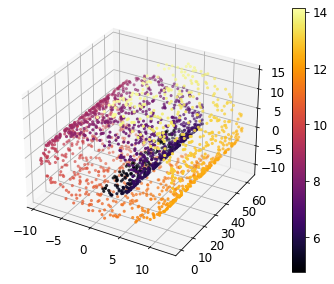

In [4]:
scprep.plot.scatter3d(x, c=t)

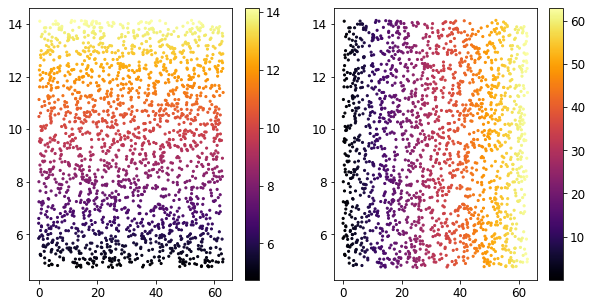

In [5]:
plot2d(ground_truth)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


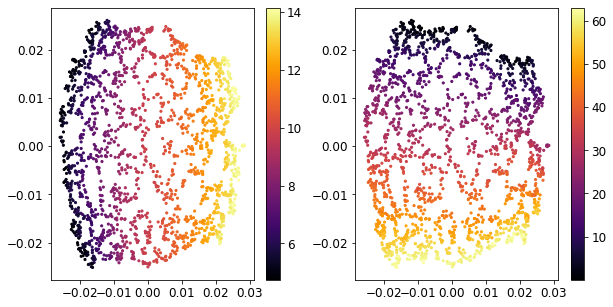

In [19]:
knn=5
tau=22
harnack=True
emb_op = new_HeatGeo(knn=knn, tau=tau, harnack=harnack, order=30, filter_method="mar")
emb = emb_op.fit_transform(x)
plot2d(emb)

Calculating PHATE...
  Running PHATE on 2000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 3.70 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.45 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.60 seconds.
Calculated PHATE in 9.79 seconds.


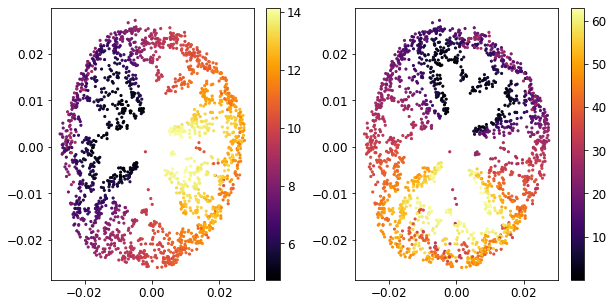

In [27]:
phate_op = phate.PHATE(random_state=42)
phate_embed = phate_op.fit_transform(x)
plot2d(phate_embed)

In [28]:
knn = 5  # default phate
tau = phate_op.optimal_t - 1  # optimal phate found above

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


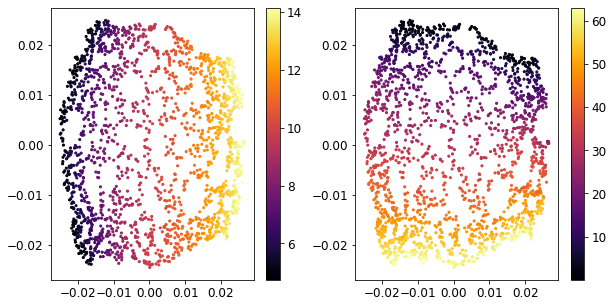

In [8]:
# exact random walk Pt
emb_op = RandWalkGeo(knn=knn, tau=tau)
emb = emb_op.fit_transform(x)
plot2d(emb)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


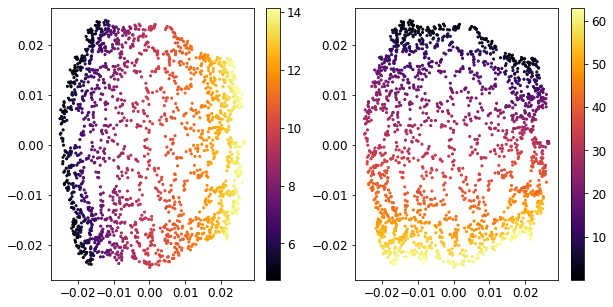

In [9]:
# exact affinity matrix A^t
emb_op = RandWalkGeo(knn=knn, tau=tau, filter_method="affinity")
emb = emb_op.fit_transform(x)
plot2d(emb)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


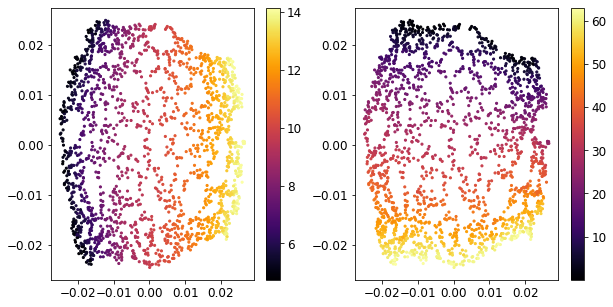

In [10]:
# Symmetric randomwlk
# exact affinity matrix A^t
emb_op = RandWalkGeo(knn=knn, tau=tau, filter_method="symmetric")
emb = emb_op.fit_transform(x)
plot2d(emb)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


after tau type
0
here


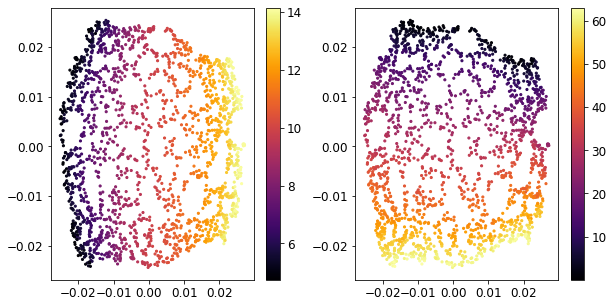

In [32]:
# with the heat kernel
tau = 22
emb_op = new_HeatGeo(knn=knn, tau=tau, n_tau=1)
emb = emb_op.fit_transform(x)
plot2d(emb)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


after tau type
0
here


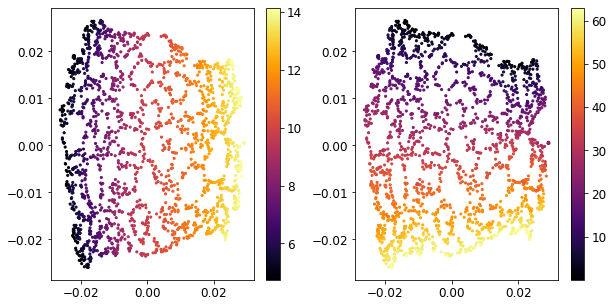

In [33]:
emb_op = new_HeatGeo(knn=knn, tau=tau, n_tau=1, filter_method="euler")
emb = emb_op.fit_transform(x)
plot2d(emb)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


after tau type
0
here


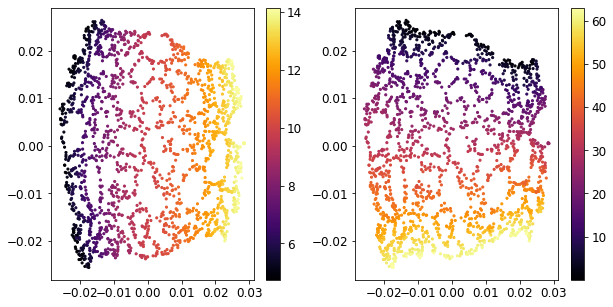

In [34]:
emb_op = new_HeatGeo(knn=knn, tau=tau, n_tau=1, filter_method="mar")
emb = emb_op.fit_transform(x)
plot2d(emb)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


after tau type
here


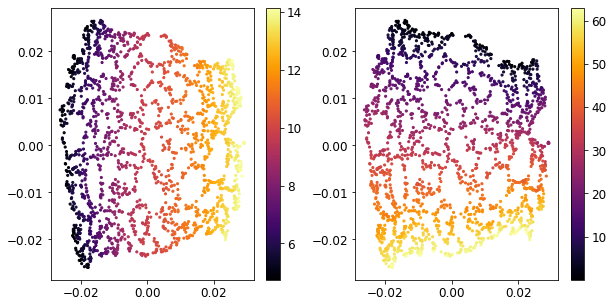

In [39]:
emb_op = new_HeatGeo(
    knn=knn, tau=22, n_tau=1, filter_method="euler", log_normalize=True
)
emb = emb_op.fit_transform(x)
plot2d(emb)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


after tau type
here


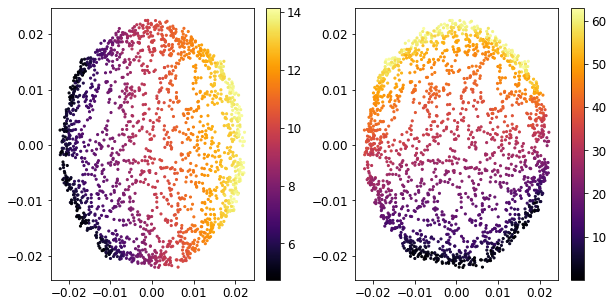

In [41]:
emb_op = new_HeatGeo(knn=knn, tau=0.5, n_tau=1, filter_method="mar", log_normalize=True)
emb = emb_op.fit_transform(x)
plot2d(emb)